In [0]:
from google.colab import files
files.upload()

Saving data_4_class.zip to data_4_class (1).zip


In [0]:
import os

In [0]:
PATH = os.getcwd()
train_data_path = os.path.join(PATH ,'data_4_class','train')
test_data_path = os.path.join(PATH ,'data_4_class','test')

In [102]:
train_data_dir_list = os.listdir(train_data_path)
test_data_dir_list = os.listdir(test_data_path)
print ('data_list: ', test_data_dir_list)

data_list:  ['dogs', 'horses', 'cats', 'humans']


In [0]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam


In [0]:
img_rows = 128
img_cols = 128
num_channel =1
num_epoch = 40
num_classes =4

In [105]:
img_data_list = list()
prev = 0
for dataset in train_data_dir_list:
  img_list = os.listdir(train_data_path + '/' + dataset)
  print('Loaded the images of Dataset -'+'{}\n'.format(dataset))
  for img in img_list:
    input_img = cv2.imread(train_data_path+'/'+dataset+'/'+img)
    input_img = cv2.cvtColor(input_img , cv2.COLOR_BGR2GRAY)
    input_img = cv2.resize(input_img , (128,218))
    img_data_list.append(input_img)
  print(len(img_data_list)-prev)
  prev = len(img_data_list)

Loaded the images of Dataset -dogs

100
Loaded the images of Dataset -horses

100
Loaded the images of Dataset -cats

100
Loaded the images of Dataset -humans

100


In [0]:
#Convert 2D to 1D array of Image
img_data = np.array(img_data_list)


In [0]:
#Convert into Float Data
img_data = img_data.astype('float32')

In [0]:
#Nom... the Data
img_data = img_data/255 # IN Gray Color range 0 to 255 then use Max Value to Norm..

In [109]:
print(img_data.shape)

(400, 218, 128)


In [150]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(80, 1, 1, 218, 128)


In [152]:

img_data.shape

(80, 1, 1, 1, 218, 128)

In [0]:
labels = np.ones((img_data.shape[0]),dtype='int64')

In [0]:
labels[0:101] = 0
labels[101:201]=1
labels[201:301] = 2
labels[301:]=3


In [0]:
names = ['Cats','Dogs','Horses','Human']

In [0]:
Y = np_utils.to_categorical(labels, num_classes)

In [0]:
X_train , Y_train  = shuffle(img_data , Y , random_state=2) 
input_shape = img_data[0].shape

In [164]:
img_data_list = list()
prev = 0
for dataset in test_data_dir_list:
  img_list = os.listdir(test_data_path + '/' + dataset)
  print('Loaded the images of Dataset -'+'{}\n'.format(dataset))
  for img in img_list:
    input_img = cv2.imread(test_data_path+'/'+dataset+'/'+img)
    input_img = cv2.cvtColor(input_img , cv2.COLOR_BGR2GRAY)
    input_img = cv2.resize(input_img , (128,218))
    img_data_list.append(input_img)
  print(len(img_data_list)-prev)
  prev = len(img_data_list)

Loaded the images of Dataset -dogs

20
Loaded the images of Dataset -horses

20
Loaded the images of Dataset -cats

20
Loaded the images of Dataset -humans

20


In [0]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255 
img_data = np.expand_dims(img_data , axis=1)
label = np.ones((img_data.shape[0]),dtype='int64')
label[0:21] = 0
label[21:31]=1
label[31:41] = 2
label[41:]=3
name = ['Cats','Dogs','Horses','Human']
Y = np_utils.to_categorical(label, num_classes)
X_test , Y_test  = shuffle(img_data , Y , random_state=2) 

In [166]:
print(X_test.shape)
X_train.shape

(80, 1, 218, 128)


(80, 1, 218, 128)

In [167]:
model = Sequential()

model.add(Convolution2D(32 , 3 , 3  , border_mode = 'same', input_shape = input_shape ))
model.add(Activation('relu'))
model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 218, 1..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])


In [169]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 218, 128)      320       
_________________________________________________________________
activation_26 (Activation)   (None, 32, 218, 128)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 216, 126)      9248      
_________________________________________________________________
activation_27 (Activation)   (None, 32, 216, 126)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 108, 63)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 108, 63)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 106, 61)       18496     
__________

In [170]:
hist = model.fit(X_train , Y_train , batch_size = 16 , nb_epoch=num_epoch , verbose=1 , validation_data=(X_test,Y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 80 samples, validate on 80 samples
Epoch 1/40
80/80 [==============================] - 1s 18ms/step - loss: 5.6537 - acc: 0.3750 - val_loss: 1.3892 - val_acc: 0.1250
Epoch 2/40
80/80 [==============================] - 1s 7ms/step - loss: 1.3539 - acc: 0.3125 - val_loss: 1.3255 - val_acc: 0.4875
Epoch 3/40
80/80 [==============================] - 1s 7ms/step - loss: 1.3586 - acc: 0.4875 - val_loss: 1.3063 - val_acc: 0.4875
Epoch 4/40
80/80 [==============================] - 1s 7ms/step - loss: 1.2753 - acc: 0.4750 - val_loss: 1.2323 - val_acc: 0.4875
Epoch 5/40
80/80 [==============================] - 1s 7ms/step - loss: 1.2735 - acc: 0.4750 - val_loss: 1.2305 - val_acc: 0.4875
Epoch 6/40
80/80 [==============================] - 1s 7ms/step - loss: 1.3544 - acc: 0.5000 - val_loss: 1.2789 - val_acc: 0.4875
Epoch 7/40
80/80 [==============================] - 1s 7ms/step - loss: 1.2945 - acc: 0.4250 - val_loss: 1.2454 - val_acc: 0.4875
Epoch 8/40
80/80 [===========================

In [171]:
hist.history

{'acc': [0.375,
  0.3125,
  0.4875,
  0.475,
  0.475,
  0.5,
  0.425,
  0.45,
  0.4875,
  0.4875,
  0.4625,
  0.5,
  0.4875,
  0.4875,
  0.4625,
  0.575,
  0.5625,
  0.5875,
  0.6,
  0.6875,
  0.725,
  0.775,
  0.85,
  0.825,
  0.875,
  0.925,
  0.8625,
  0.9,
  0.9375,
  0.9375,
  0.9375,
  0.925,
  0.9375,
  1.0,
  0.975,
  0.975,
  0.9875,
  1.0,
  0.975,
  0.9375],
 'loss': [5.653743314743042,
  1.3539401531219482,
  1.3586204767227172,
  1.2752636671066284,
  1.273494005203247,
  1.3543812036514282,
  1.2944905757904053,
  1.289668583869934,
  1.270031452178955,
  1.3087093353271484,
  1.2583365440368652,
  1.2350062608718873,
  1.125347113609314,
  1.0716768264770509,
  1.0262160420417785,
  0.938280987739563,
  0.903836190700531,
  0.8748319625854493,
  0.900963544845581,
  0.7228997707366943,
  0.6453756809234619,
  0.5063097596168518,
  0.4414622813463211,
  0.4243904411792755,
  0.3011943906545639,
  0.22180568873882295,
  0.41111116111278534,
  0.2274666264653206,
  0.172476

In [0]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)


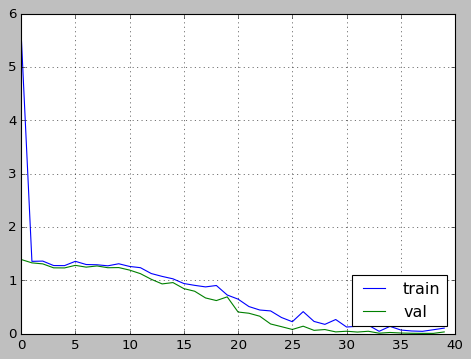

In [173]:
plt.figure(1 , figsize=(7,5))
plt.plot(xc , train_loss)
plt.plot(xc , val_loss)
plt.grid(True)
plt.legend(['train' , 'val'],loc=4)
plt.style.use(['classic'])

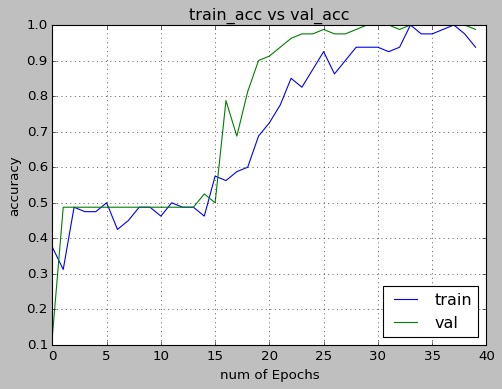

In [174]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [175]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.030445484444499016
Test accuracy: 0.9875


In [176]:
test_image = X_test[0:1]
print (test_image.shape)

(1, 1, 218, 128)


In [177]:
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(Y_test[0:1])

[[3.3756154e-05 9.9941909e-01 2.6187039e-04 2.8533721e-04]]
[1]
[[0. 1. 0. 0.]]


(218, 128)
[[2.2062766e-03 1.5670070e-05 4.1447769e-04 9.9736363e-01]]
[3]


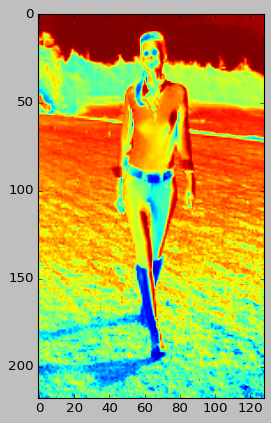

In [196]:
test_image = cv2.imread('data_4_class/train/humans/rider-8.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,218))
plt.imshow(test_image)
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		#print (test_image.shape)
		
		
# Predicting the test image
print((model.predict(test_image)))
print(model.predict_classes(test_image))

In [188]:
print((model.predict(test_image)))
print(model.predict_classes(test_image))

[[2.2062766e-03 1.5670070e-05 4.1447769e-04 9.9736363e-01]]
[3]


In [0]:
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

In [0]:
layer_num=3
filter_num=0

In [199]:
activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))


(1, 1, 32, 216, 126)
(32, 216, 126)


In [200]:
if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

(216, 126, 32)


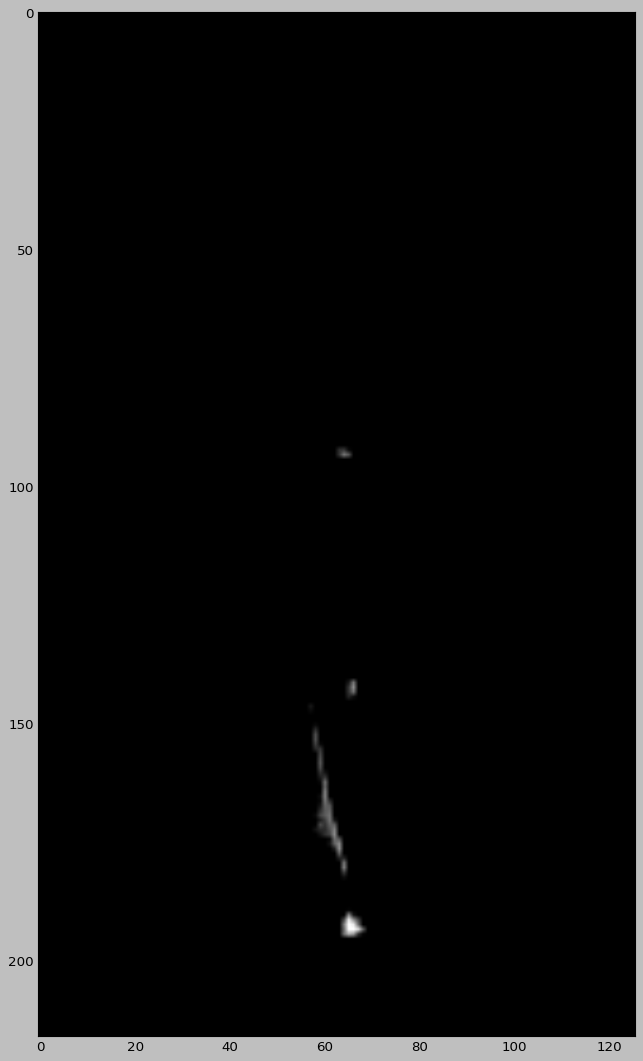

In [202]:
ig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]

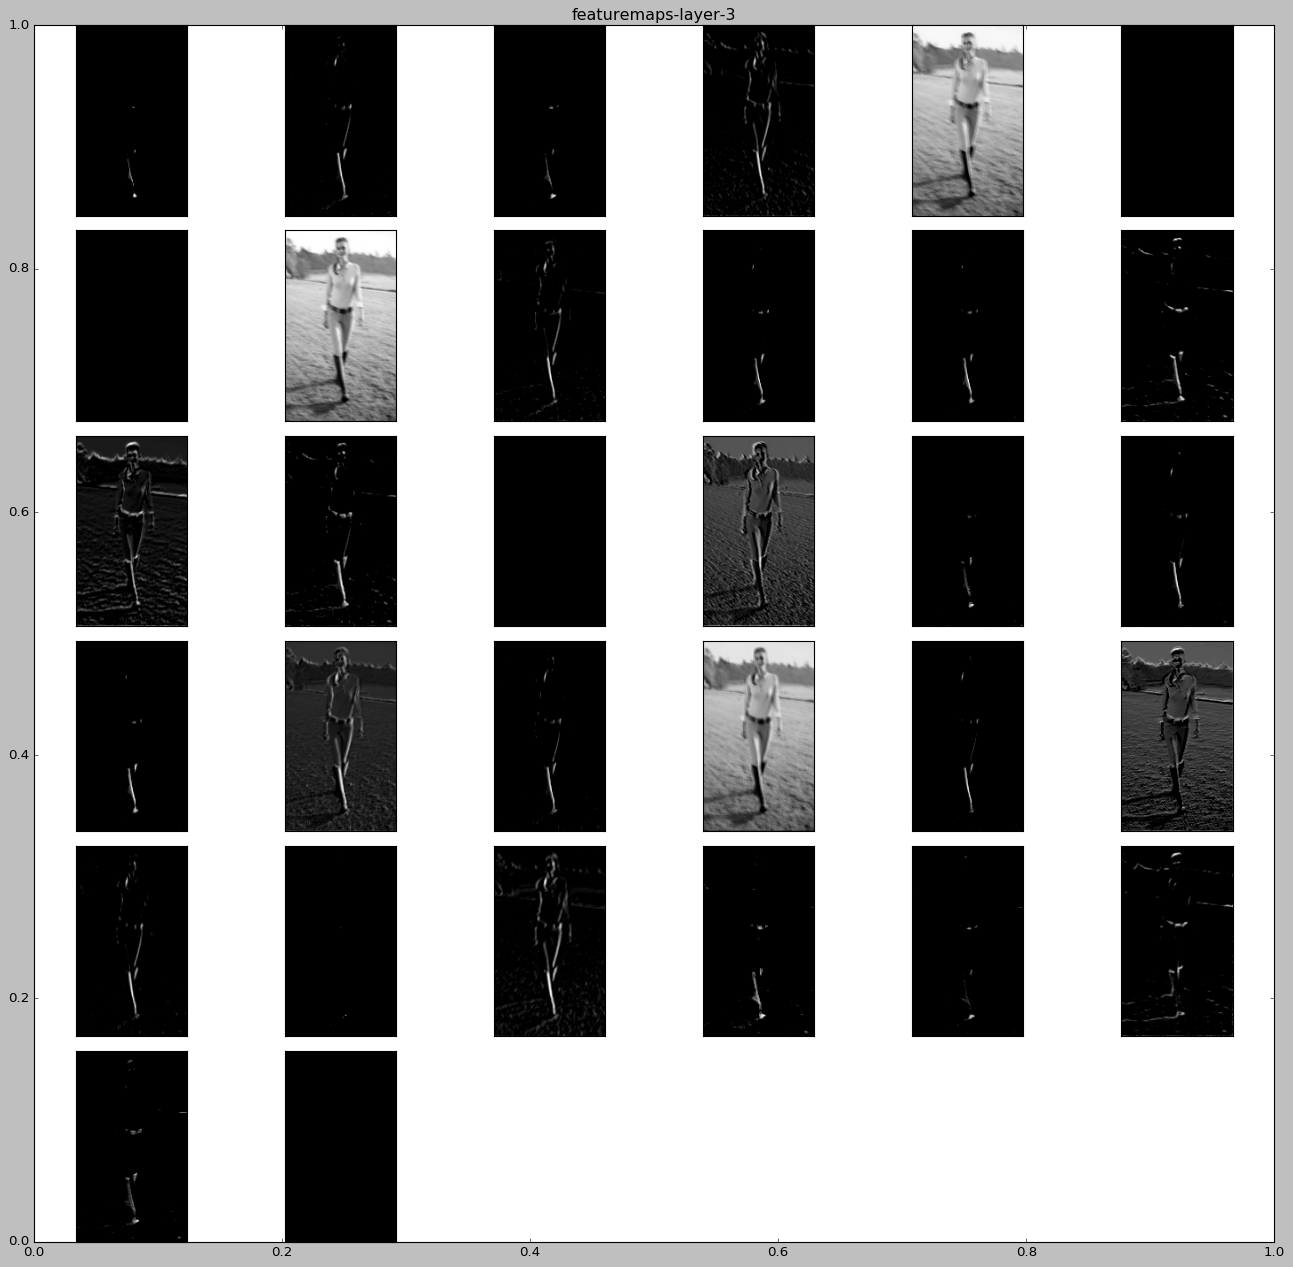

In [203]:
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

In [205]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(cats)', 'class 1(Dogs)', 'class 2(Horses)','class 3(Humans)']
					
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

[[3.37557649e-05 9.99419093e-01 2.61868874e-04 2.85336107e-04]
 [8.74207076e-03 9.32327569e-01 1.10660689e-02 4.78643104e-02]
 [7.68254569e-04 9.92416739e-01 1.65160338e-03 5.16342744e-03]
 [1.75913698e-07 1.65962145e-19 1.99163197e-09 9.99999881e-01]
 [1.10398478e-05 5.05508773e-24 2.39362583e-14 9.99988914e-01]
 [5.85598797e-02 1.24369310e-02 3.07040345e-02 8.98299217e-01]
 [5.41736822e-10 3.54985843e-13 1.00994647e-11 1.00000000e+00]
 [1.59548217e-04 5.20424635e-07 6.16444731e-06 9.99833703e-01]
 [7.93919097e-12 1.00000000e+00 3.36810552e-10 2.36794868e-08]
 [1.00000000e+00 5.82984541e-27 1.89229895e-19 4.92987295e-09]
 [9.15357958e-08 9.99997735e-01 1.42684587e-06 6.81565268e-07]
 [1.89369587e-06 5.26152510e-10 9.99537468e-01 4.60627401e-04]
 [1.98021560e-04 1.55709057e-09 1.17602980e-07 9.99801934e-01]
 [9.99878883e-01 1.49833098e-14 2.14080331e-09 1.21106314e-04]
 [3.62969186e-05 5.69118033e-20 1.91982050e-14 9.99963760e-01]
 [6.13074168e-04 1.28221771e-07 4.08713368e-06 9.993827

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  0  0  1]
 [ 0 10  0  0]
 [ 0  0 10  0]
 [ 0  0  0 39]]


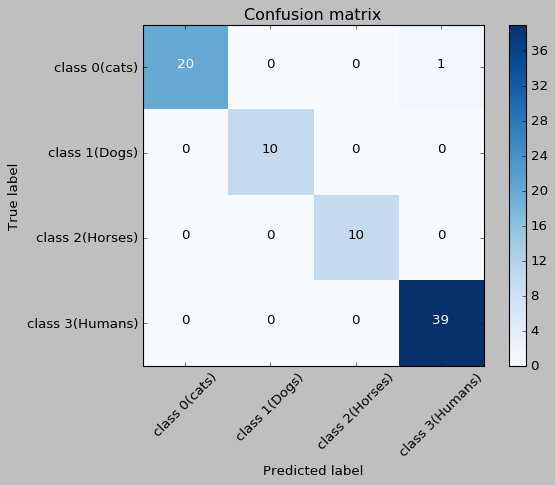

In [208]:
cnf_matrix = (confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()


In [209]:
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Saved model to disk
Loaded model from disk
